##### Importing Libraries

In [1]:
# Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
FIGSIZE = (7,5)
%matplotlib inline

### Data Description
*******

This Notebook Contains 3 datasets from the sources referenced below:

- SouthAfricaCrimeStats_v2.csv dataset was downloaded from Kaggle.com (https://Kaggle.com/slwessels/crime-statistics-for-south-africa) . The dataset was published by Stephan Wessels on the 19/10/2016 and was updated by the publisher on the 17/11/2019. It was sourced by the publisher from the South African Police (SAPS) Official website http://www.saps.gov.za/resource_centre/publications/statistics/crimestats/2015/crime_stats.php in collaboration with StatsSA and contains South African crime statistics, broken down per province, station and crime type.

- 2018_2019_crimestatistics.xlsx dataset was downloaded from (https://www.saps.gov.za/services) 

##### Observation :

According to the information about the datasets, we have two csv files one for South African crime stats and Province populations. South African crime stats dataset  consists of a mix of categorical and numerical data and has 14 columns and 30861 rows, the Province populations dataset has 4 columns and 9 rows.

The crime categories in the South African Crime stats dataset are as follows:
    
##### Crime Categories
Each category of crime which was recorded between the year 2005 - 2020:

- All theft not mentioned elsewhere <br/>
- Theft out of or from motor vehicle<br/>
- Drug-related crime<br/>
- Robbery with aggravating circumstances<br/>
- Common assault<br/>
- Commercial crime<br/>
- Burglary at residential premises<br/>
- Assault with the intent to inflict grievous bodily harm<br/>
- Theft of motor vehicle and motorcycle<br/>
- Shoplifting<br/>
- Malicious damage to property<br/>
- Common robbery<br/>
- Burglary at non-residential premises<br/>
- Sexual Offences<br/>
- Driving under the influence of alcohol or drugs<br/>
- Stock-theft<br/>
- Attempted murder<br/>
- Carjacking<br/>
- Robbery at non-residential premises<br/>
- Robbery at residential premises<br/>
- Murder<br/>
- Illegal possession of firearms and ammunition<br/>
- Arson<br/>
- Truck hijacking<br/>
- Robbery of cash in transit<br/>
- Bank robbery<br/>
- Sexual offences as result of police action<br/>
- 17 Community Reported Serious Crimes<br/>
- Attempted sexual offences<br/>
- Contact-related crime<br/>
- Contact sexual offences<br/>
- Crime detected as a result of police action<br/>
- Kidnapping<br/>
- Other serious crime<br/>
- Property-related crime<br/>
- Rape<br/>
- Sexual Assault<br/>
- Sexual offences detected as a result of police action<br/>
- TRIO Crime<br/>
- Abduction<br/>
- Crimen Injuria<br/>
- Culpable homicide<br/>
- Neglect and ill-treatment of children<br/>
- Public violence<br/>
     

##### Provinces

The provinces we will be looking at crime are as follows:

1.  Gauteng
2.  Kwazulu-Natal
3.  Eastern Cape
4.  Western Cape
5.  Limpopo
6.  Mpumalanga
7.  North West
8.  Free State
9.  Northern Cape


### Limitation
---


The South African Police Service regardless of being the major source of the crime statistics in the country still does not represent all crimes in the country as not all crimes are reported/recorded by the police due to several reason .i.e Lack of trust in the police by victims/communities, police officers taking victims/communities seriously depending on the type of crime committed, the race of who is reporting the crime or the area where it is committed etc. This means that the official numbers might be under-representing a particular category/the total crime rate in the country. 


---
## Loading and displaying the Datasets


The dataset was loaded into the Notebook and displayed to view the structure. The dataset contains a information of each province in the country, the SAPS stations in those provinces where crime has been reported, the category of each crime and the time-period(2005 - 2015).

######  Crime Data and Population Data
---

In [2]:
# Here we are Loading the first crime  datasets
SA_crime_stats = pd.read_csv("SouthAfricaCrimeStats_v2.csv") #,header=0)

# Here we are Loading the population  datasets 
population_stats = pd.read_csv('ProvincePopulation.csv').sort_values('Population',ascending=False)


######  GDP Data and Population Data
---

In [3]:
gdp_data = pd.read_csv("south-africa-gdp-per-capita.csv") #,header=0)
#Name of columns, gdp and population data
population_data = pd.read_csv("south-africa-population-2021-06-02.csv")


######  loading the Crime Statistic Worksheets
---

In [4]:
file="Crime-Statistics-2019_2020.xlsx"
df = pd.ExcelFile(file)


In [5]:
# Selecting a  worksheet we need
dfnew = df.parse('station data 2020')
dfnew=dfnew.reset_index()
dfnew.columns = dfnew.columns.str.replace('index','Unnamed: 0')


######  loading the 2020 Crime  
---

In [6]:
# loading the 2020 crime Data
crime_data = pd.read_csv('Crime-Statistics-2019_2020.csv')



---


Here will be getting a feel of the Data by Mostly Displaying the First few rows of the Data set we have Loaded, which also includes looking at the Columns of our Data Sets 

######  Crime Data and Population Data
---

In [7]:

#Displaying the Names of columns and crime data
print('list of features: \n\n' , SA_crime_stats.columns.values)
print('  ')
SA_crime_stats.head()

list of features: 

 ['Province' 'Station' 'Category' '2005-2006' '2006-2007' '2007-2008'
 '2008-2009' '2009-2010' '2010-2011' '2011-2012' '2012-2013' '2013-2014'
 '2014-2015' '2015-2016']
  


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [8]:
# Displaying the Names of columns and population data
print('list of features: \n\n', population_stats.columns.values)
print(' ')

population_stats.head()

list of features: 

 ['Province' 'Population' 'Area' 'Density']
 


,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
5,Eastern Cape,6562053,168966,38.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0


######  GDP Data and Population Data
---

In [9]:
# Displaying the first 5 rows of the GDP dataset
gdp_data.head()

,date,GDP Per Capita
0,1960-12-31,443.0098
1,1961-12-31,454.9620
2,1962-12-31,473.0116
3,1963-12-31,511.4973
4,1964-12-31,548.9959


In [10]:
# Displaying the first 5 rows of the Population dataset
population_data.head()

,date,Population
0,1950-12-31,13628428
1,1951-12-31,13921934
2,1952-12-31,14226256
3,1953-12-31,14541559
4,1954-12-31,14868158


######  Reading the Crime Statistic Worksheets
---

In [11]:
#displaying the worksheet names
print(df.sheet_names)

['List', 'Final unfounded2020', 'Final  2020', 'Sheet9', 'station data 2020', 'Top 30', 'Prov data', 'National Crime stats 2019_20', 'Station ten year stats', 'Top 30 Stations', 'Top 30 Per Province', 'CDPA Top 30 per province', 'CDPA Top 30 stations']


In [12]:
# Reading the First few columns of from the 1.3 sheet which was selected
dfnew.head()

,Unnamed: 0,Unnamed: 0,Crime Category station Province_station,Crime Category prov,Crime Category station prov,station,Station_type,Province_station,cluster,prov,...,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Unfounded,Annual minus unfounded,2019-2020.1,National Station position
0,0,NaN,17 Community Reported Serious Crimes EASTERN C...,17 Community Reported Serious Crimes EC,17 Community Reported Serious Crimes EASTERN CAPE,EASTERN CAPE,0,EASTERN_CAPE,EC,EC,...,172562.0,166077.0,167892.0,163189.0,169300.0,168322.0,1136.0,168322.0,169458.0,1.0
1,1,NaN,All theft not mentioned elsewhere EASTERN CAPE...,All theft not mentioned elsewhere EC,All theft not mentioned elsewhere EASTERN CAPE,EASTERN CAPE,0,EASTERN_CAPE,EC,EC,...,25597.0,23429.0,24486.0,23174.0,24277.0,24188.0,124.0,24188.0,24312.0,2.0
2,2,NaN,Arson EASTERN CAPE EASTERN_CAPE,Arson EC,Arson EASTERN CAPE,EASTERN CAPE,0,EASTERN_CAPE,EC,EC,...,785.0,679.0,748.0,605.0,698.0,666.0,11.0,666.0,677.0,3.0
3,3,NaN,Assault with the intent to inflict grievous bo...,Assault with the intent to inflict grievous bo...,Assault with the intent to inflict grievous bo...,EASTERN CAPE,0,EASTERN_CAPE,EC,EC,...,25431.0,24818.0,23241.0,23133.0,24125.0,23376.0,6.0,23376.0,23382.0,4.0
4,4,NaN,Attempted murder EASTERN CAPE EASTERN_CAPE,Attempted murder EC,Attempted murder EASTERN CAPE,EASTERN CAPE,0,EASTERN_CAPE,EC,EC,...,1832.0,2052.0,2110.0,2232.0,2305.0,2409.0,2.0,2409.0,2411.0,5.0


######  Reading the 2020 Crime  
---

In [13]:
# Here were reading the 2020 Crime Data from 1.4
crime_data.head()

,Unnamed: 0,station,prov,Crime Category,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,0,EASTERN CAPE,EC,17 Community Reported Serious Crimes,194667.0,192308.0,191950.0,188898.0,182634.0,180732.0,172562.0,166077.0,167892.0,163189.0,169300.0,168322.0
1,1,EASTERN CAPE,EC,All theft not mentioned elsewhere,32902.0,28289.0,30077.0,28931.0,26198.0,27699.0,25597.0,23429.0,24486.0,23174.0,24277.0,24188.0
2,2,EASTERN CAPE,EC,Arson,1018.0,1084.0,1068.0,980.0,968.0,1061.0,785.0,679.0,748.0,605.0,698.0,666.0
3,3,EASTERN CAPE,EC,Assault with the intent to inflict grievous bo...,31234.0,32081.0,30671.0,29275.0,27788.0,27361.0,25431.0,24818.0,23241.0,23133.0,24125.0,23376.0
4,4,EASTERN CAPE,EC,Attempted murder,1985.0,1927.0,1701.0,1721.0,1755.0,1853.0,1832.0,2052.0,2110.0,2232.0,2305.0,2409.0


## Data Wrangling 
 *****
 
 The Loaded data is being inspected and cleaned to avoid future issues.
 The data below contains  columns we don't need we will drop them and save our data to csv, load csv data and replace characters we don't need, we also fill missing values using columns mean.

In [14]:
# We are selecting the GDP Data From 2005 until 2019
gdp_datanew = gdp_data.iloc[45:,:].reset_index(drop=True)

gdp_datanew.head()

,date,GDP Per Capita
0,2005-12-31,5383.6565
1,2006-12-31,5602.0110
2,2007-12-31,6095.6224
3,2008-12-31,5760.8053
4,2009-12-31,5862.7973


In [15]:
# We are selecting the Population Data From 2005 until 2019
population_datanew = population_data.iloc[55:71,:].reset_index(drop=True)

population_datanew.head()

,date,Population
0,2005-12-31,47880601
1,2006-12-31,48489459
2,2007-12-31,49119759
3,2008-12-31,49779471
4,2009-12-31,50477011


In [16]:
# Now we combine the GDP data set with the Population Data 
GDP_and_Population = pd.merge(gdp_datanew,population_datanew, left_on = 'date',right_on='date',how='left')
GDP_and_Population.head()

,date,GDP Per Capita,Population
0,2005-12-31,5383.6565,47880601
1,2006-12-31,5602.0110,48489459
2,2007-12-31,6095.6224,49119759
3,2008-12-31,5760.8053,49779471
4,2009-12-31,5862.7973,50477011


In [17]:
# adjusting the Columns Names
GDP_and_Population.columns = GDP_and_Population.columns.str.replace('GDP Per Capita','GDP per Capita')
# Changing the Datatype of the variables in the column 'GDP per Capita' into a string variable 
GDP_and_Population['GDP per Capita'] =GDP_and_Population['GDP per Capita'].astype(str)
# removing the dots from variables  in the column 'GDP per Capita'
GDP_and_Population['GDP per Capita'] =GDP_and_Population['GDP per Capita'].str.replace('\.', '')
GDP_and_Population['GDP per Capita'] = GDP_and_Population['GDP per Capita'].str.replace('56020109999999995','56020110')
# Changing the Datatype of the variables in the column 'GDP per Capita' into a intigers
GDP_and_Population['GDP per Capita'] = GDP_and_Population['GDP per Capita'].astype(int)
GDP_and_Population.head()

,date,GDP per Capita,Population
0,2005-12-31,53836565,47880601
1,2006-12-31,56020110,48489459
2,2007-12-31,60956224,49119759
3,2008-12-31,57608053,49779471
4,2009-12-31,58627973,50477011


In [18]:
# Adjusting the YEAR column data
z=['2005-2006','2006-2007','2007-2008','2008-2009',
     '2009-2010','2010-2011','2011-2012','2012-2013',
    '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020']
GDP_and_Population.date = pd.DataFrame(z)

# Viewing the adjusted data
GDP_and_Population.head()

,date,GDP per Capita,Population
0,2005-2006,53836565,47880601
1,2006-2007,56020110,48489459
2,2007-2008,60956224,49119759
3,2008-2009,57608053,49779471
4,2009-2010,58627973,50477011


In [19]:
#checking for all categories in the dataset loaded in 1.3 (2020 crime).
dfnew['prov'].unique()

array(['EC', 'FS', 'GP', 'KZN', 'LP', 'MP', 'NW', 'NC', 'RSA', 'WC', nan],
      dtype=object)

In [20]:
# checking for the number of missing values in 2020 crime Dataset
print(dfnew.isna().sum())

Unnamed: 0                                     0
Unnamed: 0                                 57761
Crime Category station Province_station    12238
Crime Category prov                        12238
Crime Category station prov                12238
station                                    12238
Station_type                               12238
Province_station                           12238
cluster                                    12277
prov                                       12238
Crime Category                             12238
2008-2009                                  12238
2009-2010                                  12238
2010-2011                                  12238
2011-2012                                  12238
2012-2013                                  12238
2013-2014                                  12238
2014-2015                                  12238
2015-2016                                  12238
2016-2017                                  12238
2017-2018           

- As we can see from the output , there is still  are a large number missing value in our Data

In [21]:
# Removing Or Dropping the Columns which is not usefull in our Project
dfnew.drop(["Unnamed: 0","Crime Category station Province_station","Crime Category prov","Crime Category station prov","Station_type","Province_station","cluster","Unfounded","Annual minus unfounded","2019-2020.1","National Station position"],axis = 1, inplace = True)
dfnew.head()

,station,prov,Crime Category,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,EASTERN CAPE,EC,17 Community Reported Serious Crimes,194667.0,192308.0,191950.0,188898.0,182634.0,180732.0,172562.0,166077.0,167892.0,163189.0,169300.0,168322.0
1,EASTERN CAPE,EC,All theft not mentioned elsewhere,32902.0,28289.0,30077.0,28931.0,26198.0,27699.0,25597.0,23429.0,24486.0,23174.0,24277.0,24188.0
2,EASTERN CAPE,EC,Arson,1018.0,1084.0,1068.0,980.0,968.0,1061.0,785.0,679.0,748.0,605.0,698.0,666.0
3,EASTERN CAPE,EC,Assault with the intent to inflict grievous bo...,31234.0,32081.0,30671.0,29275.0,27788.0,27361.0,25431.0,24818.0,23241.0,23133.0,24125.0,23376.0
4,EASTERN CAPE,EC,Attempted murder,1985.0,1927.0,1701.0,1721.0,1755.0,1853.0,1832.0,2052.0,2110.0,2232.0,2305.0,2409.0


In [22]:
# Remoning all the null values in our Data
data = dfnew.dropna()
# Removing the Variable 'RSA' from the column 'prov' in our data
data = data.drop(data[data['prov']=='RSA'].index)
#printing all the Variables in the column 'prov'
data['prov'].unique()

array(['EC', 'FS', 'GP', 'KZN', 'LP', 'MP', 'NW', 'NC', 'WC'],
      dtype=object)

In [23]:
# Rechecking for missing values
print(data.isna().sum())

station           0
prov              0
Crime Category    0
2008-2009         0
2009-2010         0
2010-2011         0
2011-2012         0
2012-2013         0
2013-2014         0
2014-2015         0
2015-2016         0
2016-2017         0
2017-2018         0
2018-2019         0
2019-2020         0
dtype: int64


- Now as we call see our Data has no null values anymore

In [24]:
# displaying the first five rows in our cleaned data
data.head()

,station,prov,Crime Category,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,EASTERN CAPE,EC,17 Community Reported Serious Crimes,194667.0,192308.0,191950.0,188898.0,182634.0,180732.0,172562.0,166077.0,167892.0,163189.0,169300.0,168322.0
1,EASTERN CAPE,EC,All theft not mentioned elsewhere,32902.0,28289.0,30077.0,28931.0,26198.0,27699.0,25597.0,23429.0,24486.0,23174.0,24277.0,24188.0
2,EASTERN CAPE,EC,Arson,1018.0,1084.0,1068.0,980.0,968.0,1061.0,785.0,679.0,748.0,605.0,698.0,666.0
3,EASTERN CAPE,EC,Assault with the intent to inflict grievous bo...,31234.0,32081.0,30671.0,29275.0,27788.0,27361.0,25431.0,24818.0,23241.0,23133.0,24125.0,23376.0
4,EASTERN CAPE,EC,Attempted murder,1985.0,1927.0,1701.0,1721.0,1755.0,1853.0,1832.0,2052.0,2110.0,2232.0,2305.0,2409.0


In [25]:
# Saiving our cleaned Dataset
data.to_csv('Crime-Statistics-2019_2020.csv')

In [26]:
# crime_data = pd.read_csv('Crime-Statistics-2019_2020.csv')

# dropping the unnamed Columns in our data
crime_data.drop(["Unnamed: 0"],axis = 1, inplace = True)

# Renaming the column 'station' into 'Station'
crime_data.columns = crime_data.columns.str.replace('station','Station')

# Renaming the column 'prov' into 'Province'
crime_data.columns = crime_data.columns.str.replace('prov','Province')

# Renaming the column 'Crime Category' into 'Category'
crime_data.columns = crime_data.columns.str.replace('Crime Category','Category')
#displaying the data
crime_data.head()

,Station,Province,Category,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,EASTERN CAPE,EC,17 Community Reported Serious Crimes,194667.0,192308.0,191950.0,188898.0,182634.0,180732.0,172562.0,166077.0,167892.0,163189.0,169300.0,168322.0
1,EASTERN CAPE,EC,All theft not mentioned elsewhere,32902.0,28289.0,30077.0,28931.0,26198.0,27699.0,25597.0,23429.0,24486.0,23174.0,24277.0,24188.0
2,EASTERN CAPE,EC,Arson,1018.0,1084.0,1068.0,980.0,968.0,1061.0,785.0,679.0,748.0,605.0,698.0,666.0
3,EASTERN CAPE,EC,Assault with the intent to inflict grievous bo...,31234.0,32081.0,30671.0,29275.0,27788.0,27361.0,25431.0,24818.0,23241.0,23133.0,24125.0,23376.0
4,EASTERN CAPE,EC,Attempted murder,1985.0,1927.0,1701.0,1721.0,1755.0,1853.0,1832.0,2052.0,2110.0,2232.0,2305.0,2409.0


In [27]:

# Setting the Datatypes for all columns variables to be integers
crime_data['2008-2009']=crime_data['2008-2009'].astype(int)
crime_data['2009-2010']=crime_data['2009-2010'].astype(int)
crime_data['2010-2011']=crime_data['2010-2011'].astype(int)
crime_data['2011-2012']=crime_data['2011-2012'].astype(int)
crime_data['2012-2013']=crime_data['2012-2013'].astype(int)
crime_data['2013-2014']=crime_data['2013-2014'].astype(int)
crime_data['2014-2015']=crime_data['2014-2015'].astype(int)
crime_data['2015-2016']=crime_data['2015-2016'].astype(int)
crime_data['2016-2017']=crime_data['2016-2017'].astype(int)
crime_data['2017-2018']=crime_data['2017-2018'].astype(int)
crime_data['2018-2019']=crime_data['2018-2019'].astype(int)
crime_data['2019-2020']=crime_data['2019-2020'].astype(int)
# displaying the data
crime_data.head()

,Station,Province,Category,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,EASTERN CAPE,EC,17 Community Reported Serious Crimes,194667,192308,191950,188898,182634,180732,172562,166077,167892,163189,169300,168322
1,EASTERN CAPE,EC,All theft not mentioned elsewhere,32902,28289,30077,28931,26198,27699,25597,23429,24486,23174,24277,24188
2,EASTERN CAPE,EC,Arson,1018,1084,1068,980,968,1061,785,679,748,605,698,666
3,EASTERN CAPE,EC,Assault with the intent to inflict grievous bo...,31234,32081,30671,29275,27788,27361,25431,24818,23241,23133,24125,23376
4,EASTERN CAPE,EC,Attempted murder,1985,1927,1701,1721,1755,1853,1832,2052,2110,2232,2305,2409


In [28]:
# Replacing the Abbreviation for the Provinces in the province columns into their full names
crime_data['Province'] = crime_data['Province'].str.replace('EC','Eastern Cape')
crime_data['Province'] = crime_data['Province'].str.replace('FS','Free State')
crime_data['Province'] = crime_data['Province'].str.replace('GP','Gauteng')
crime_data['Province'] = crime_data['Province'].str.replace('KZN','Kwazulu Natal')
crime_data['Province'] = crime_data['Province'].str.replace('LP','Limpopo')
crime_data['Province'] = crime_data['Province'].str.replace('MP','Mpumalanga')
crime_data['Province'] = crime_data['Province'].str.replace('NW','North West')
crime_data['Province'] = crime_data['Province'].str.replace('NC','Northern Cape')
crime_data['Province'] = crime_data['Province'].str.replace('WC','Western Cape')
#displaying the Data
crime_data.head()

,Station,Province,Category,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,EASTERN CAPE,Eastern Cape,17 Community Reported Serious Crimes,194667,192308,191950,188898,182634,180732,172562,166077,167892,163189,169300,168322
1,EASTERN CAPE,Eastern Cape,All theft not mentioned elsewhere,32902,28289,30077,28931,26198,27699,25597,23429,24486,23174,24277,24188
2,EASTERN CAPE,Eastern Cape,Arson,1018,1084,1068,980,968,1061,785,679,748,605,698,666
3,EASTERN CAPE,Eastern Cape,Assault with the intent to inflict grievous bo...,31234,32081,30671,29275,27788,27361,25431,24818,23241,23133,24125,23376
4,EASTERN CAPE,Eastern Cape,Attempted murder,1985,1927,1701,1721,1755,1853,1832,2052,2110,2232,2305,2409


In [29]:
# Concatenating or Interconnecting  the Datasets SA_crime_stats and crime_data
Crime_Stats_SA = pd.concat([SA_crime_stats,crime_data], axis = 0, ignore_index = True)
Crime_Stats_SA.head() 

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692.0,6341.0,5966.0,5187,4985,5127,5285,5937,5600,5335,5176,NaN,NaN,NaN,NaN
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093.0,4602.0,3761.0,3610,3267,3037,2886,2638,2809,3050,2434,NaN,NaN,NaN,NaN
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341.0,6093.0,6316.0,6803,6035,5761,6108,5514,4975,4043,3635,NaN,NaN,NaN,NaN
3,Free State,Park Road,All theft not mentioned elsewhere,5108.0,4282.0,3834.0,3316,3101,3013,2679,3116,2927,2297,2103,NaN,NaN,NaN,NaN
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099.0,4536.0,3309.0,2694,2616,2606,2635,3226,3246,2892,3030,NaN,NaN,NaN,NaN


In [30]:
# Displaying the information about the new Data set Crime_Stats_SA
display(Crime_Stats_SA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76345 entries, 0 to 76344
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   76345 non-null  object 
 1   Station    76345 non-null  object 
 2   Category   76345 non-null  object 
 3   2005-2006  30861 non-null  float64
 4   2006-2007  30861 non-null  float64
 5   2007-2008  30861 non-null  float64
 6   2008-2009  76345 non-null  int64  
 7   2009-2010  76345 non-null  int64  
 8   2010-2011  76345 non-null  int64  
 9   2011-2012  76345 non-null  int64  
 10  2012-2013  76345 non-null  int64  
 11  2013-2014  76345 non-null  int64  
 12  2014-2015  76345 non-null  int64  
 13  2015-2016  76345 non-null  int64  
 14  2016-2017  45484 non-null  float64
 15  2017-2018  45484 non-null  float64
 16  2018-2019  45484 non-null  float64
 17  2019-2020  45484 non-null  float64
dtypes: float64(7), int64(8), object(3)
memory usage: 10.5+ MB


None

- As we can see from the output there is the Variables from columns 2005-2006 , 2006-2007 , 2007-2008 , 2016-2017 , 2017-2018 , 2018-2019 , 2019-2020 are floats while the Variables from columns 2008-2009 until 2015-2016 are integers which is not good for our data, so have to save all non Categorical variables as integers.

In [31]:
# Checking for null values in our data
print(Crime_Stats_SA.isna().sum())

Province         0
Station          0
Category         0
2005-2006    45484
2006-2007    45484
2007-2008    45484
2008-2009        0
2009-2010        0
2010-2011        0
2011-2012        0
2012-2013        0
2013-2014        0
2014-2015        0
2015-2016        0
2016-2017    30861
2017-2018    30861
2018-2019    30861
2019-2020    30861
dtype: int64


- As we can see there is still a number of missing values in our data ,which will have to be removed. 

In [32]:
# Removing all the null values in our Data and filling them with 0 instead.

Crime_Stats_SA['2005-2006']=Crime_Stats_SA['2005-2006'].fillna(0)
Crime_Stats_SA['2006-2007']=Crime_Stats_SA['2006-2007'].fillna(0)
Crime_Stats_SA['2007-2008']=Crime_Stats_SA['2007-2008'].fillna(0)
Crime_Stats_SA['2016-2017']=Crime_Stats_SA['2016-2017'].fillna(0)
Crime_Stats_SA['2017-2018']=Crime_Stats_SA['2017-2018'].fillna(0)
Crime_Stats_SA['2018-2019']=Crime_Stats_SA['2018-2019'].fillna(0)
Crime_Stats_SA['2019-2020']=Crime_Stats_SA['2019-2020'].fillna(0)

# Setting all the Float Columns into Integers.

Crime_Stats_SA['2005-2006']=Crime_Stats_SA['2005-2006'].astype(int)
Crime_Stats_SA['2006-2007']=Crime_Stats_SA['2006-2007'].astype(int)
Crime_Stats_SA['2007-2008']=Crime_Stats_SA['2007-2008'].astype(int)
Crime_Stats_SA['2016-2017']=Crime_Stats_SA['2016-2017'].astype(int)
Crime_Stats_SA['2017-2018']=Crime_Stats_SA['2017-2018'].astype(int)
Crime_Stats_SA['2018-2019']=Crime_Stats_SA['2018-2019'].astype(int)
Crime_Stats_SA['2019-2020']=Crime_Stats_SA['2019-2020'].astype(int)
Crime_Stats_SA=Crime_Stats_SA.mask(Crime_Stats_SA==0).fillna(Crime_Stats_SA.mean())

cols = ['2005-2006','2006-2007','2007-2008','2008-2009',
        '2009-2010','2010-2011','2011-2012','2012-2013',
        '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020']

Crime_Stats_SA[cols] = Crime_Stats_SA[cols].applymap(np.int64)
Crime_Stats_SA['Province'] = Crime_Stats_SA['Province'].str.replace(r'/',' ')
# Resolving the grammatical errors In the Category Column.
Crime_Stats_SA['Category'] = Crime_Stats_SA['Category'].str.replace('Bank Robbery','Bank robbery')
Crime_Stats_SA['Category'] = Crime_Stats_SA['Category'].str.replace('Sexual Offences detected as a result of Police Action','Sexual offences detected as a result of police action')
Crime_Stats_SA['Category'] = Crime_Stats_SA['Category'].str.replace('Truck hijacking ','Truck hijacking')
Crime_Stats_SA['Category'] = Crime_Stats_SA['Category'].str.replace('Contact Crime','Contact-related crime')
Crime_Stats_SA['Category'] = Crime_Stats_SA['Category'].str.replace('Commercial Crime','Commercial crime')
Crime_Stats_SA['Category'] = Crime_Stats_SA['Category'].str.replace('Drug-related Crime','Drug-related crime')
Crime_Stats_SA.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176,161,157,153,147
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434,161,157,153,147
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635,161,157,153,147
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103,161,157,153,147
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030,161,157,153,147


In [33]:
# Checking the Variables in the Column 'Province'
Crime_Stats_SA['Province'].unique()

array(['Western Cape', 'Gauteng', 'Free State', 'North West',
       'Kwazulu Natal', 'Mpumalanga', 'Eastern Cape', 'Limpopo',
       'Northern Cape'], dtype=object)

In [34]:
# Removing the Variable 'RSA' from the column 'Province'
Crime_Stats_SA = Crime_Stats_SA.drop(Crime_Stats_SA[Crime_Stats_SA['Province']=='RSA'].index)

#### Getting information about the data


##### Checking for duplicates

In [35]:
# Checking for duplicated values in the data
print(Crime_Stats_SA.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
76340    False
76341    False
76342    False
76343    False
76344    False
Length: 76345, dtype: bool


- As we can see our data has no dupliced values , which is good.

**Crime Distribution by Year**

We look at how the dataset is distributed for each year period,from the results below, we see that the average crime is around 70 for all the years.

In [36]:
#Finding more details about the dataset
print(Crime_Stats_SA.describe())

          2005-2006     2006-2007     2007-2008      2008-2009      2009-2010  \
count  76345.000000  76345.000000  76345.000000   76345.000000   76345.000000   
mean      48.443055     47.878826     46.121698     235.314729     236.421154   
std      131.495940    126.721852    119.612670    3428.040540    3441.198340   
min        1.000000      1.000000      1.000000       1.000000       1.000000   
25%       28.000000     28.000000     27.000000       9.000000      10.000000   
50%       28.000000     28.000000     27.000000      59.000000      60.000000   
75%       28.000000     28.000000     27.000000     190.000000     191.000000   
max     6692.000000   6341.000000   6316.000000  584510.000000  583568.000000   

           2010-2011      2011-2012      2012-2013      2013-2014  \
count   76345.000000   76345.000000   76345.000000   76345.000000   
mean      229.899378     228.028830     231.008789     234.513642   
std      3314.970229    3239.881778    3261.295322    3309.0060

- From the above Discription we see the Minimum ,maximun, mean and all the quartiles for Each column , which can be useful.

#### Creating a DataSet to combine Total Crime , Gdp per capita and population
---

#### Grouping crime by Province

In [37]:
# Group Crime Counts by Province
crimes_by_province = Crime_Stats_SA.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020'].sum()
# displaying the data
crimes_by_province.head()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
Province,,,,,,,,,,,,,,,
Eastern Cape,505481,496536,475585,2197092,2189652,2145404,2130309,2091725,2086661,2011213,1968345,2304365,2244770,2239789,2178826
Free State,285547,275367,269300,1267089,1235306,1199563,1207819,1238119,1220252,1153782,1147210,1300905,1257632,1238101,1178101
Gauteng,832925,816203,784557,4671793,4659657,4427637,4154669,4150313,4417565,4434882,4338868,4239130,4113645,4001205,3884512
Kwazulu Natal,583476,579334,553062,2725401,2781581,2727264,2722312,2829801,2783198,2738483,2678550,2913402,2874244,2804426,2726611
Limpopo,246843,244409,230006,1050943,1058358,1033402,1131402,1093634,1129531,1149057,1151875,1302795,1250352,1227768,1177649


In [38]:
# Group Crime Counts by Category
Crime_Stats_SA['Total'] = Crime_Stats_SA.sum(axis=1)
crimes_by_category = Crime_Stats_SA.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020','Total']
crimes_by_category_totals = crimes_by_category.sum().reset_index().sort_values('Total',ascending=False)

In [39]:
#The most reported category of crime
crimes_by_category_totals[crimes_by_category_totals['Total']==max(crimes_by_category_totals['Total'])]

,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Total
0,17 Community Reported Serious Crimes,32648,32648,31482,3779362,3776118,3639210,3607096,3622349,3610280,3594984,3543912,3480053,3326572,3348592,3258943,42684249


- The output above is showing the Most Reported Crime Category


In [40]:
#5 most reported crimes 
most_reported =crimes_by_category_totals.sort_values(by='Total', ascending=False)
most_reported.head(5)

,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Total
0,17 Community Reported Serious Crimes,32648,32648,31482,3779362,3776118,3639210,3607096,3622349,3610280,3594984,3543912,3480053,3326572,3348592,3258943,42684249
15,Contact-related crime,65296,65296,62964,1650352,1627958,1540766,1497812,1478548,1480259,1496332,1505364,1465186,1438164,1473507,1470435,18318239
2,All theft not mentioned elsewhere,458486,441370,419873,1174254,1092966,1095570,1121304,1078479,1096341,1086255,1026056,843787,786490,777476,734978,13233685
27,Property-related crime,32648,32648,31482,1061776,1102764,1064424,1066828,1121015,1118947,1110256,1089898,1083399,1017363,991087,938898,12863433
26,Other serious crime,32648,32648,31482,1093644,1069653,1057642,1062172,1039796,1025549,1003063,961950,941772,877796,890577,854461,11974853


- The output above is showing the  5 Most Reported Crime Category

In [41]:
#The least reported category of crime 
crimes_by_category_totals[crimes_by_category_totals['Total']==min(crimes_by_category_totals['Total'])]

,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Total
1,Abduction,56,56,54,380,382,372,372,378,386,386,380,322,314,306,3,4147


- The output above is showing the least Reported Crime Category

#### Grouping Crime by Category

In [42]:
crime_category = Crime_Stats_SA.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020'].sum()
columns = crime_category.transpose().columns
crimes_by_category_transpose = crime_category.transpose()
crimes_by_category_transpose['index'] = crimes_by_category_transpose.index

#### Group Crime Counts by Station

In [43]:
# Group Crime Counts by Station
Crime_Stats_SA['Total'] = Crime_Stats_SA.sum(axis=1)
crimes_by_station = Crime_Stats_SA.groupby(['Station'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','2016-2017','2017-2018','2018-2019','2019-2020','Total']
crimes_by_stations = crimes_by_station.sum().reset_index().sort_values('Total',ascending=False)

In [44]:
crimes_by_stations[crimes_by_stations['Total']==max(crimes_by_stations['Total'])]

,Station,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2016-2017,2017-2018,2018-2019,2019-2020,Total
599,GAUTENG,1092,1092,1053,1878788,1879257,1781474,1678259,1683401,1794571,1800152,1761662,1710873,1662702,1617974,42029640


- The output above is showing the station with most Reported Crime 

In [45]:
crimes_by_stations[crimes_by_stations['Total']==min(crimes_by_stations['Total'])]

,Station,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2016-2017,2017-2018,2018-2019,2019-2020,Total
443,Devon,453,461,432,1128,1132,1041,1422,1120,1199,1453,4347,4239,4131,3969,55336


- The output above is showing the station with least Reported Crime 

In [46]:
# Create Total Stations by Province Dataframe
number_of_stations_per_province = pd.DataFrame(Crime_Stats_SA['Province'].value_counts()).reset_index()
number_of_stations_per_province['Total Stations'] = number_of_stations_per_province['Province']
number_of_stations_per_province.drop('Province',axis=1,inplace=True)
number_of_stations_per_province['Province'] = number_of_stations_per_province['index']
number_of_stations_per_province.drop('index',axis=1,inplace=True)

In [47]:
# Create All Province Totals Dataframe (Crime + Population Data)
Crime_Stats_SA['Total'] = Crime_Stats_SA.sum(axis=1)
crimes_by_province = Crime_Stats_SA.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020','Total']
crimes_by_Province_totals = crimes_by_province.sum().reset_index().sort_values('Total',ascending=False)
# Set Index To Province (To add totals)
crimes_by_Province_totals.set_index('Province',inplace=True)
number_of_stations_per_province.set_index('Province',inplace=True)
population_stats.set_index('Province',inplace=True)

# Add Totals to province_totals Dataframe
crimes_by_Province_totals['Total Stations'] = number_of_stations_per_province['Total Stations']
crimes_by_Province_totals['Population'] = population_stats['Population']
crimes_by_Province_totals['Area'] = population_stats['Area']
crimes_by_Province_totals['Density'] = population_stats['Density']

# Reset index back
crimes_by_Province_totals = crimes_by_Province_totals.reset_index()
number_of_stations_per_province = number_of_stations_per_province.reset_index()
population_stats = population_stats.reset_index()

In [48]:
crimes_by_Province_totals[crimes_by_Province_totals['Total']==max(crimes_by_Province_totals['Total'])]

,Province,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,...,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Total,Total Stations,Population,Area,Density
0,Gauteng,832925,816203,784557,4671793,4659657,4427637,4154669,4150313,4417565,...,4338868,4239130,4113645,4001205,3884512,161782683,9477,12272263.0,18178.0,675.1


- The output above is showing the station with most Reported Crime 

In [49]:
crimes_by_Province_totals[crimes_by_Province_totals['Total']==min(crimes_by_Province_totals['Total'])]

,Province,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,...,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Total,Total Stations,Population,Area,Density
8,Northern Cape,184895,181125,172830,762203,758177,714373,700670,718934,710395,...,723791,871497,850827,839731,808638,29182107,6045,1145861.0,372889.0,3.1


- The output above is showing the Province with least Reported Crime 

#####  Creating a DataSet to combine 'Total crimes' , 'Gdp per capita' and 'Popoulation'

In [50]:
# Grouping  the Crime_Stats_SA Dataset by Province
provinces = Crime_Stats_SA.groupby('Province')
provinces =provinces.aggregate(np.sum)

total1 = provinces['2005-2006'].sum()
total2 = provinces['2006-2007'].sum()
total3 = provinces['2007-2008'].sum()
total4 = provinces['2008-2009'].sum()
total5 = provinces['2009-2010'].sum()
total6 = provinces['2010-2011'].sum()
total7 = provinces['2011-2012'].sum()
total8 = provinces['2012-2013'].sum()
total9 = provinces['2013-2014'].sum()
total10 = provinces['2014-2015'].sum()
total11 = provinces['2015-2016'].sum()
total12 = provinces['2016-2017'].sum()
total13 = provinces['2017-2018'].sum()
total14 = provinces['2018-2019'].sum()
total15 = provinces['2019-2020'].sum()
total = total1+total2+total3+total4+total5+total6+total7+total8+total9+total10+total11+total12+total13+total14+total15
totals = [pd.Series([ total1, 
                      total2, 
                      total3, 
                      total4, 
                      total5,
                      total6,
                      total7,
                      total8,
                      total9,
                      total10,
                      total11,
                      total12,
                      total13,
                      total14,
                      total15,
                    total], index=provinces.columns)] 
          
provinces =provinces.append(totals ) 
provinces

index = provinces.index
index_list = index.tolist()
index_list
index_list[9] = 'Total'
provinces.index = index_list
provinces.head()


,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Total
Eastern Cape,505481,496536,475585,2197092,2189652,2145404,2130309,2091725,2086661,2011213,1968345,2304365,2244770,2239789,2178826,81797259
Free State,285547,275367,269300,1267089,1235306,1199563,1207819,1238119,1220252,1153782,1147210,1300905,1257632,1238101,1178101,46422279
Gauteng,832925,816203,784557,4671793,4659657,4427637,4154669,4150313,4417565,4434882,4338868,4239130,4113645,4001205,3884512,161782683
Kwazulu Natal,583476,579334,553062,2725401,2781581,2727264,2722312,2829801,2783198,2738483,2678550,2913402,2874244,2804426,2726611,105063435
Limpopo,246843,244409,230006,1050943,1058358,1033402,1131402,1093634,1129531,1149057,1151875,1302795,1250352,1227768,1177649,43434072


In [51]:
x = provinces.T
x.head()

,Eastern Cape,Free State,Gauteng,Kwazulu Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
2005-2006,505481,285547,832925,583476,246843,249629,228040,184895,581549,3698385
2006-2007,496536,275367,816203,579334,244409,245488,220187,181125,596660,3655309
2007-2008,475585,269300,784557,553062,230006,234926,215615,172830,585280,3521161
2008-2009,2197092,1267089,4671793,2725401,1050943,1141616,1040723,762203,3108243,17965103
2009-2010,2189652,1235306,4659657,2781581,1058358,1127713,1021902,758177,3217227,18049573


In [52]:
# dropping all the some of the column Provinces from the data set
new_df = x.drop(['Eastern Cape', 'Free State', 'Gauteng', 'Kwazulu Natal', 'Limpopo',
       'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape'] , axis = 1)
new_df.index.name='date'

df_new=new_df.reset_index()
df_new.head()

,date,Total
0,2005-2006,3698385
1,2006-2007,3655309
2,2007-2008,3521161
3,2008-2009,17965103
4,2009-2010,18049573


In [53]:
# drop the row of Totals
total_data=df_new.drop([15],axis=0)
total_data.head()

,date,Total
0,2005-2006,3698385
1,2006-2007,3655309
2,2007-2008,3521161
3,2008-2009,17965103
4,2009-2010,18049573


In [54]:
# Combinging the Data sets 'total_data' and  'GDP_and_Population' 
GDP_and_Population_total = pd.merge(total_data,GDP_and_Population, left_on = 'date',right_on='date',how='left')
GDP_and_Population_total.head()

,date,Total,GDP per Capita,Population
0,2005-2006,3698385,53836565,47880601
1,2006-2007,3655309,56020110,48489459
2,2007-2008,3521161,60956224,49119759
3,2008-2009,17965103,57608053,49779471
4,2009-2010,18049573,58627973,50477011


In [55]:
# Showing the correlation between , Total Crimes , GDP per Capita and Population
GDP_and_Population_total.corr()

,Total,GDP per Capita,Population
Total,1.000000,0.024739,0.666110
GDP per Capita,0.024739,1.000000,0.034242
Population,0.666110,0.034242,1.000000


 - From the above output we can see that there is a positive correlation between population and crime rate in South Africa 
increase in population has corresponding increase in crime rate 

---
##  Exploratory plots

##### Total Crime number of crimes for 14 years (2005 - 2019)

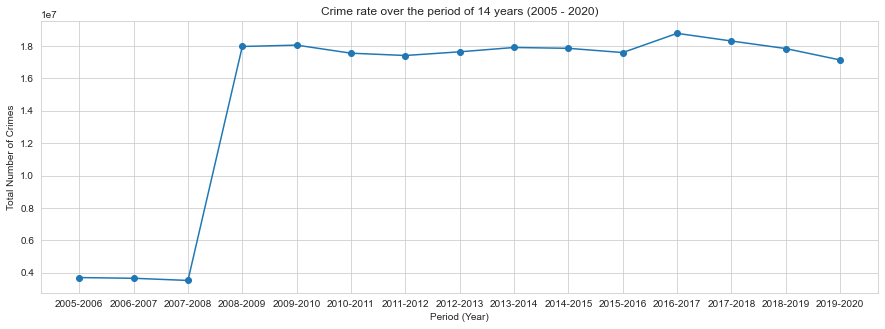

In [56]:
fg,ax = plt.subplots(figsize=(15, 5))
total_crime = Crime_Stats_SA.iloc[:,0:18].melt(id_vars=['Province','Station','Category'], var_name='Years', value_name='Crime').groupby(['Years'])[['Crime']].sum()
ax.set_ylabel("Total Number of Crimes")
ax.set_xlabel("Period (Year)")
plt.title('Crime rate over the period of 14 years (2005 - 2020)')
plt.plot(total_crime, linestyle='-', marker='o');

- From the diagram above we can see that crime has increased rapidly from 2007-2008 and whiles in the years 2016 until 2020 crime has been decreasing slowly.

#####  visualising crime for provinces from 2005-2016

Text(0.5, 1.0, 'Crime per province')

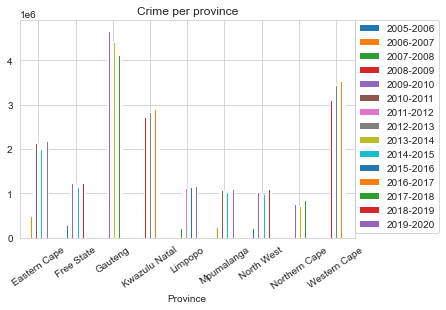

In [57]:
# Group Crime Counts by Province
crimes_by_province = Crime_Stats_SA.groupby(['Province'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020'].sum()
#visualising crime for provinces from 2005-2016
crimes_by_province.plot(kind='bar', rot=35)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title('Crime per province')


- As we can see from the diagram above  the province of gauteng has the Highest crimes reportes whiles the North west province has the lowest reported crimes

#####  visualizing crime per provinces from 2005-2015

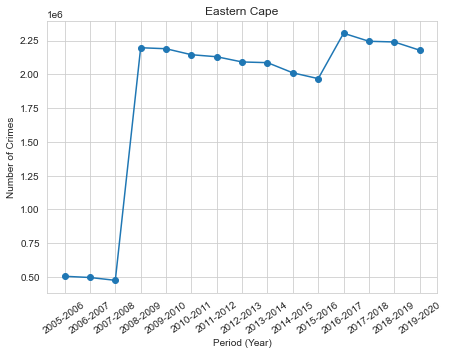

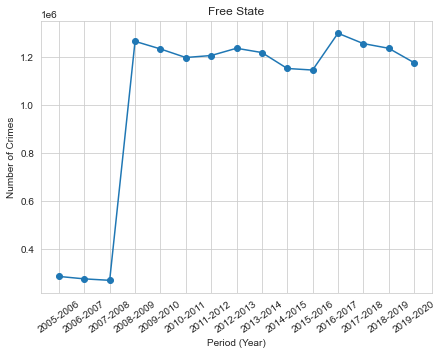

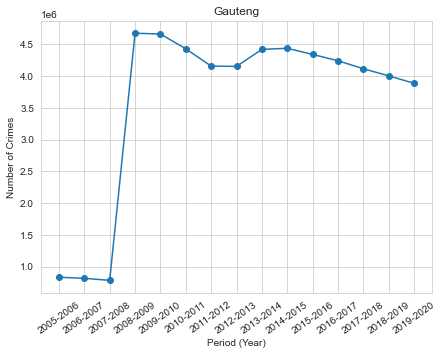

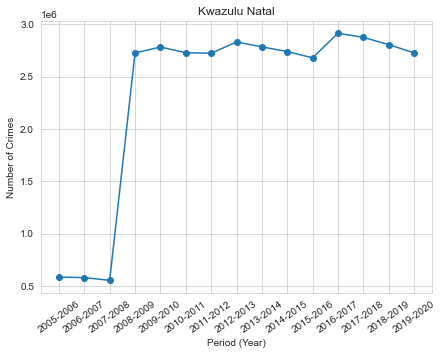

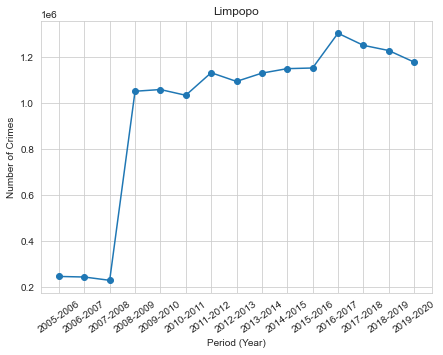

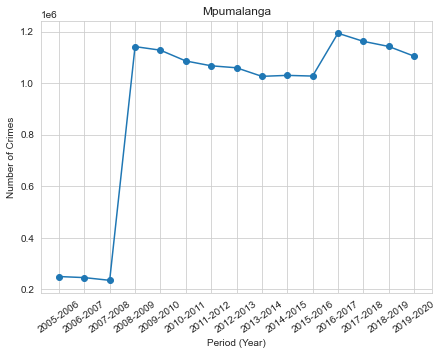

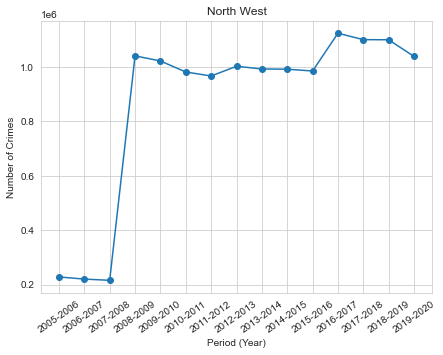

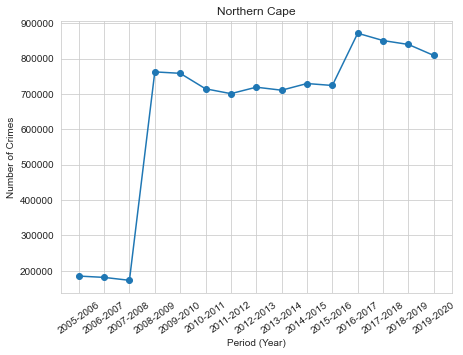

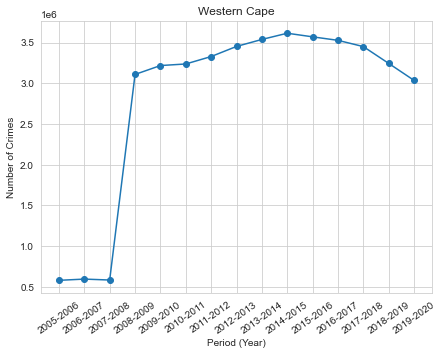

In [58]:
#visualizing crime per provinces from 2005-2015
columns = crimes_by_province.transpose().columns
Crimes_Province_transpose = crimes_by_province.transpose()
Crimes_Province_transpose['index'] = Crimes_Province_transpose.index

number_rows=9
number_columns=1

for i in range(number_rows):
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=FIGSIZE)
    for j in range(number_columns):
        plt.plot(Crimes_Province_transpose['index'], Crimes_Province_transpose[columns[i]], linestyle='-', marker='o')
        ax.set_ylabel("Number of Crimes")
        ax.set_xlabel("Period (Year)")
        ax.set_xticks(Crimes_Province_transpose['index'])
        ax.set_xticklabels(Crimes_Province_transpose['index'],rotation=35)
        plt.title(columns[i*number_columns+j])

- The Above diagrams are showing The crimes trends for each province from the year 2005 until 2020

#####  Total Crimes Reported by Category (2005-2020)

Text(0.5, 0, 'Number of Crimes Reported')

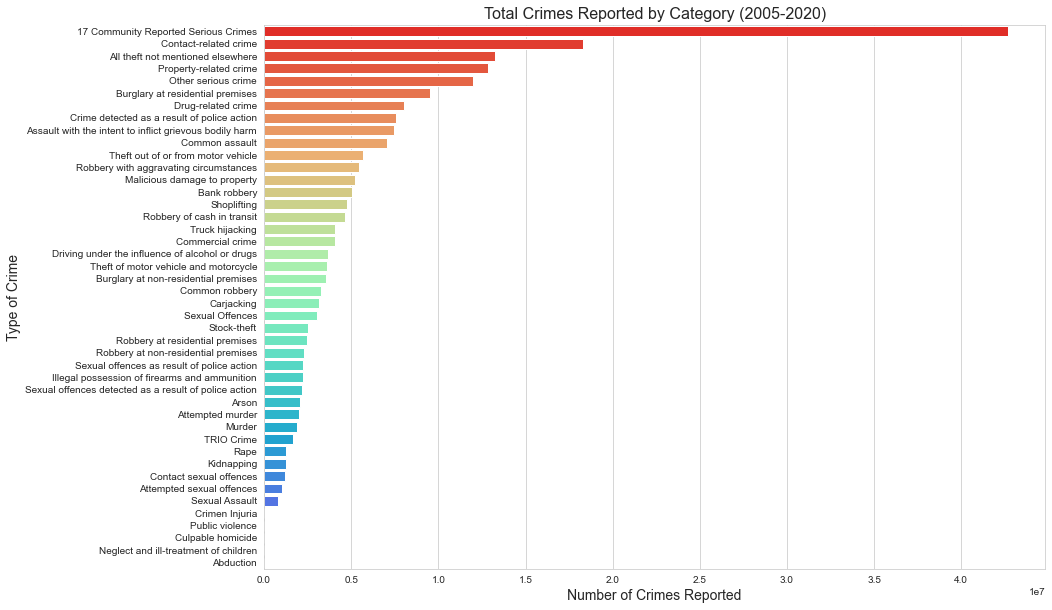

In [59]:
plt.figure(figsize=(14,10)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=crimes_by_category_totals,y='Category',x='Total',palette='rainbow_r')
ax.set_title('Total Crimes Reported by Category (2005-2020)',fontsize=16)
ax.set_ylabel('Type of Crime',fontsize=14)
ax.set_xlabel('Number of Crimes Reported',fontsize=14)

- From the diagram above we can  see that the most reported crime category is 17 community reported serious crimes and  contact-related crimes whils the least reported crimes are Abduction and Neglect and ill-treatment of childrean.

#####  Visualizing the number of crime per category
Crime rates over the years for each category

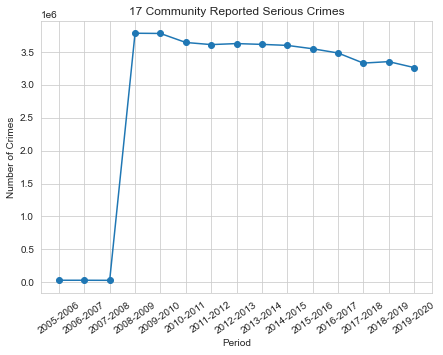

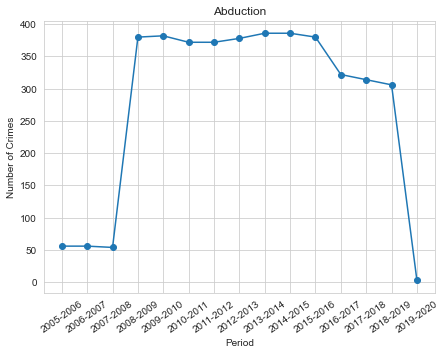

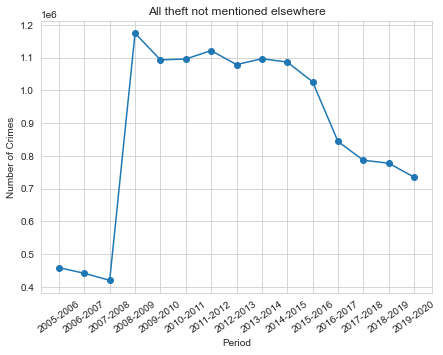

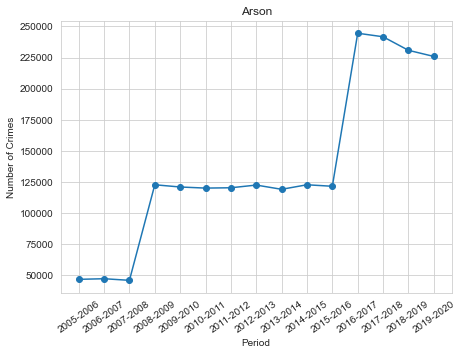

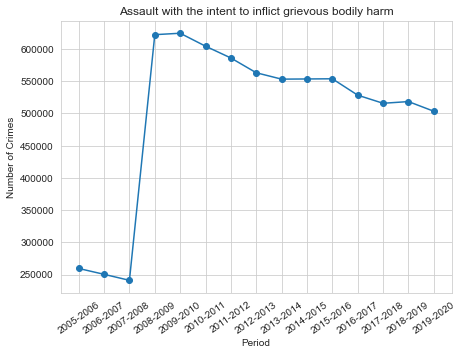

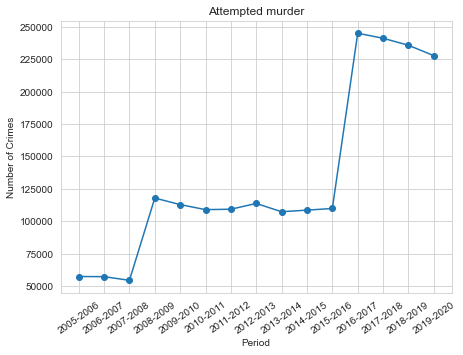

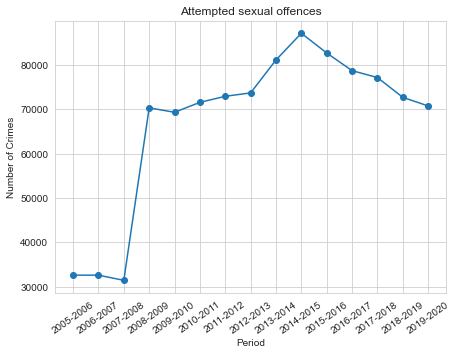

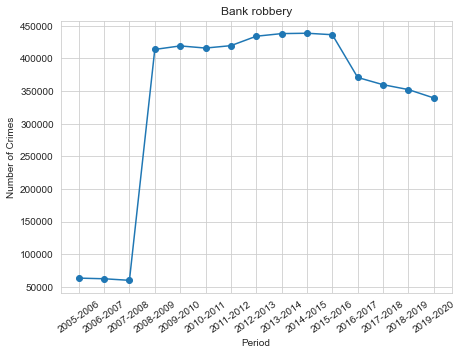

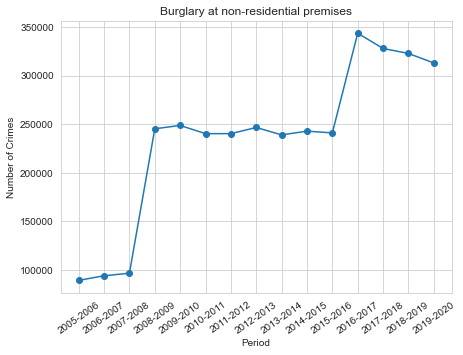

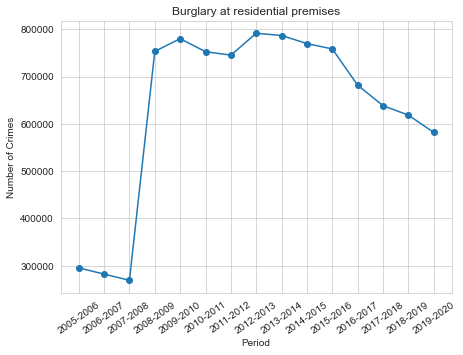

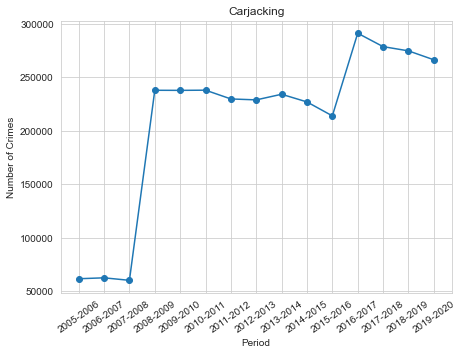

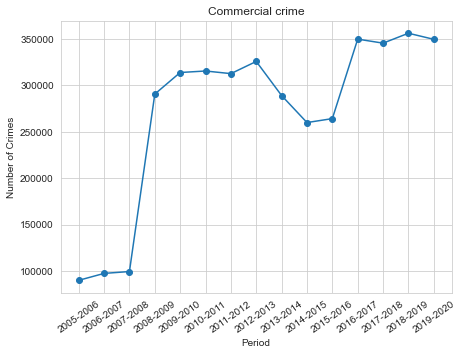

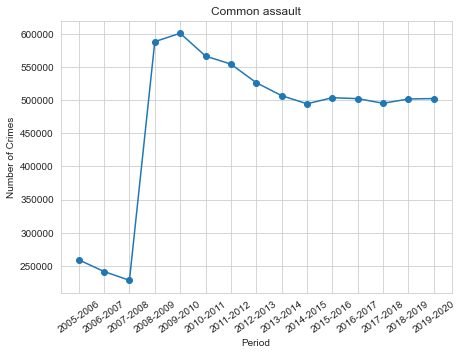

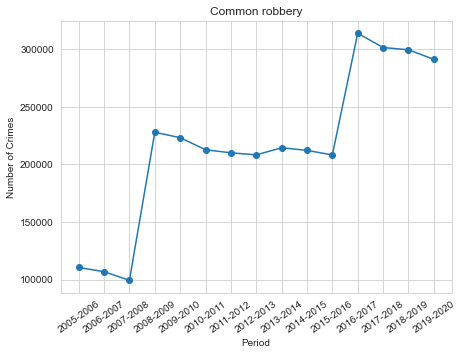

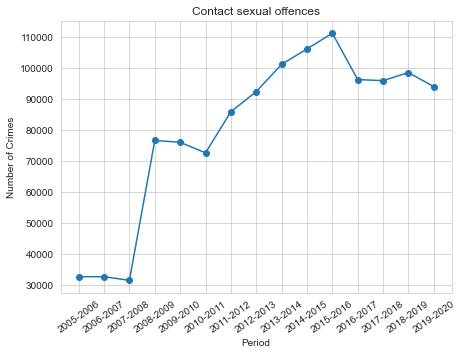

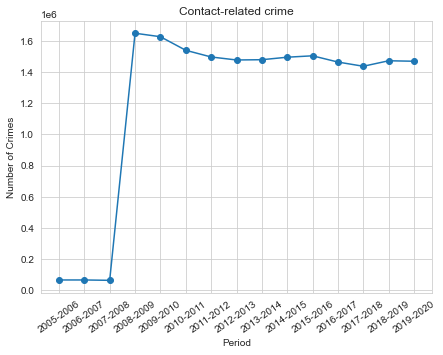

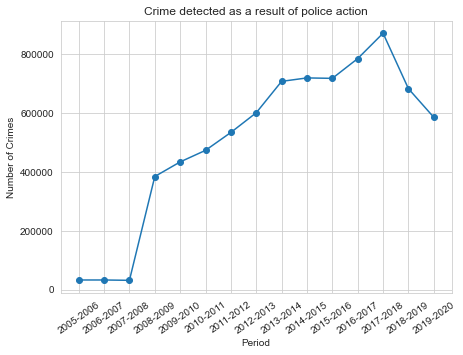

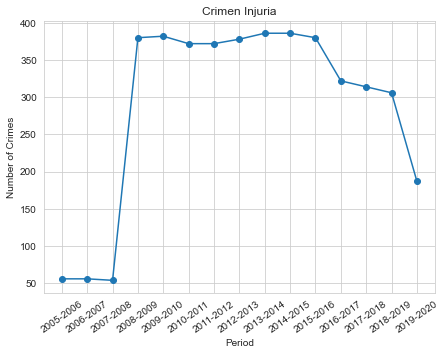

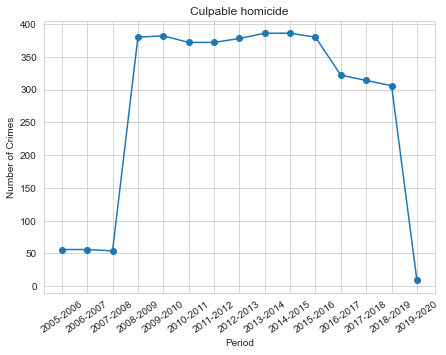

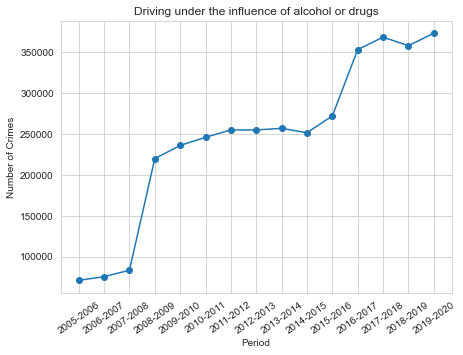

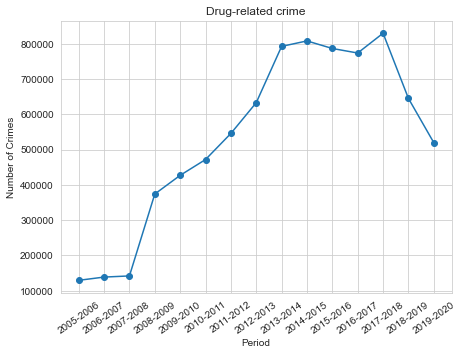

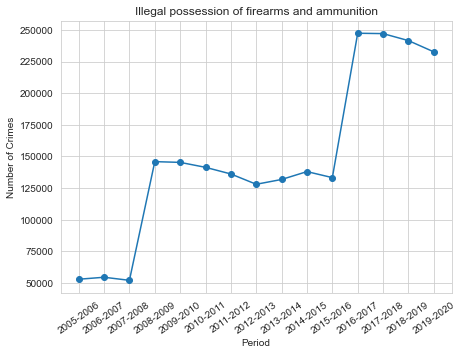

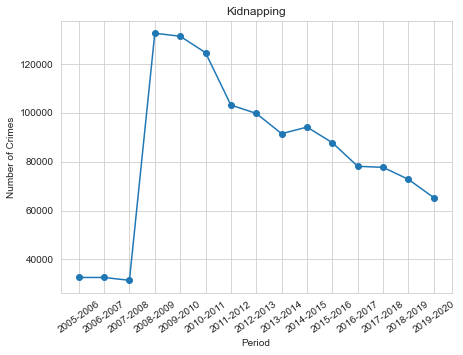

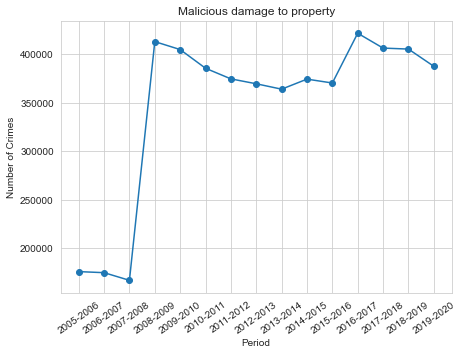

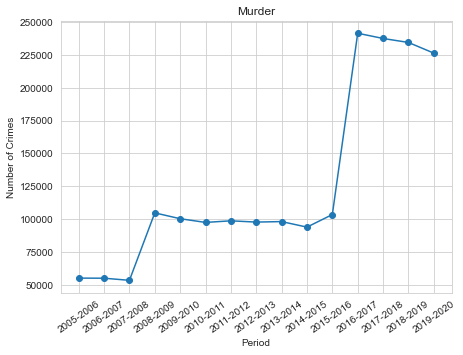

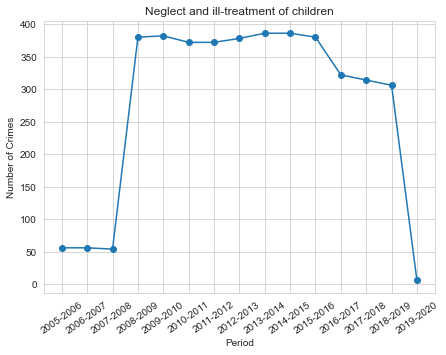

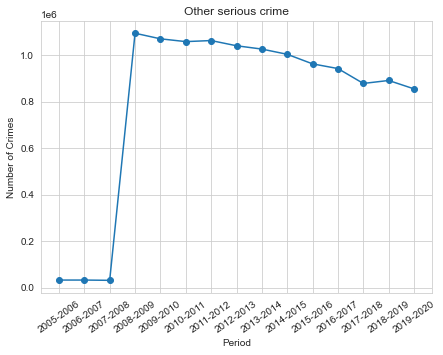

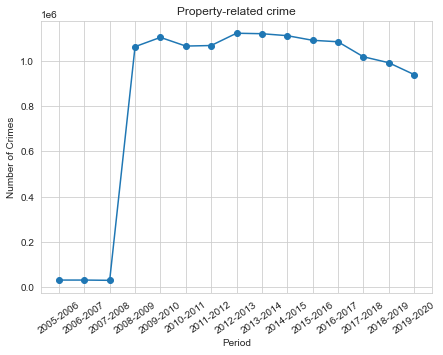

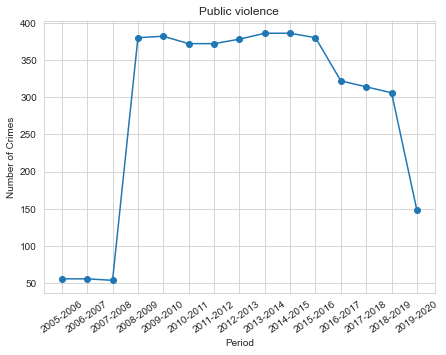

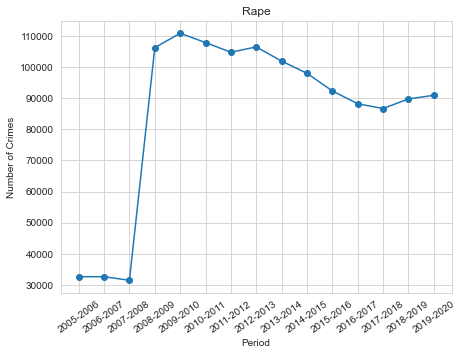

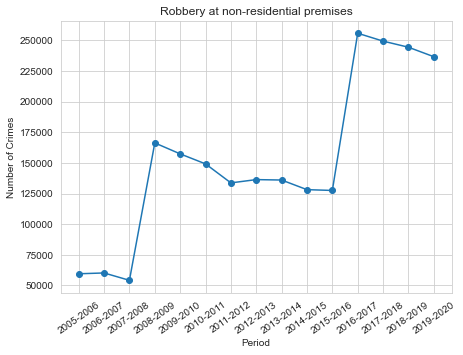

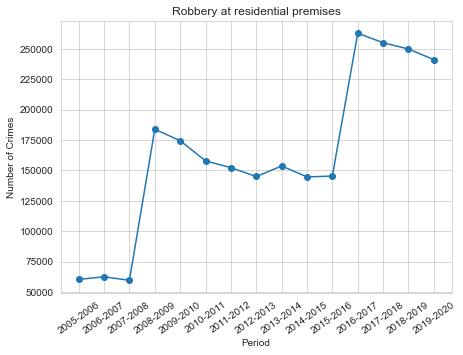

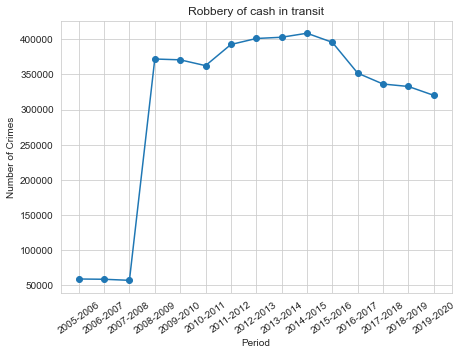

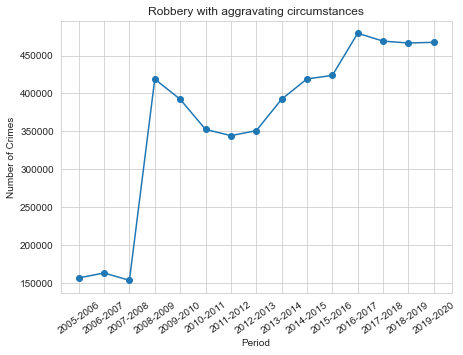

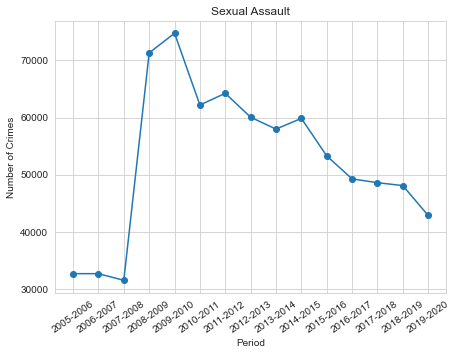

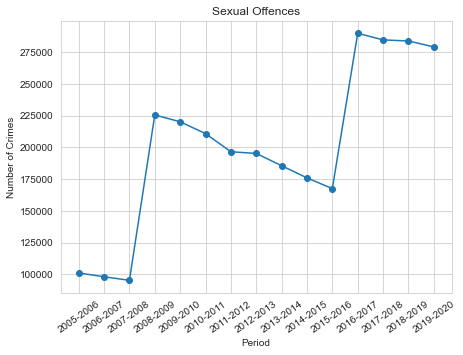

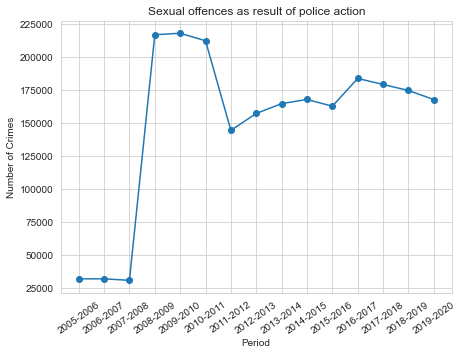

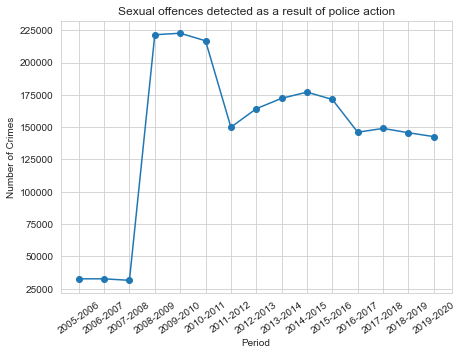

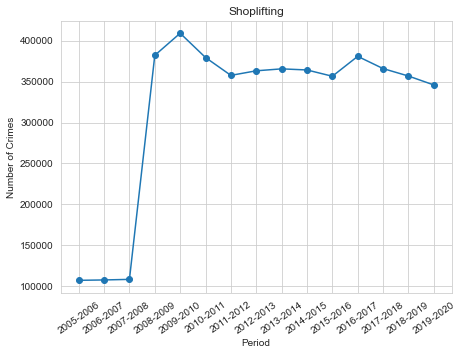

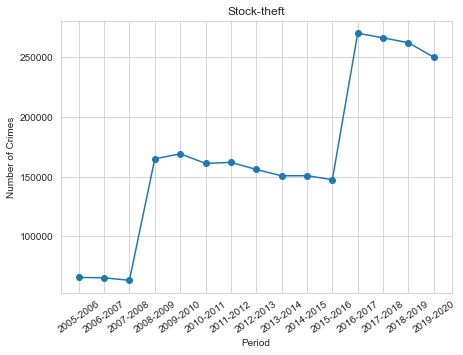

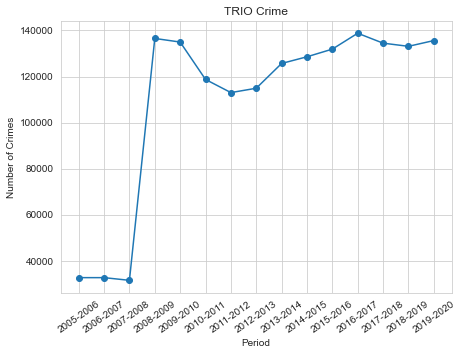

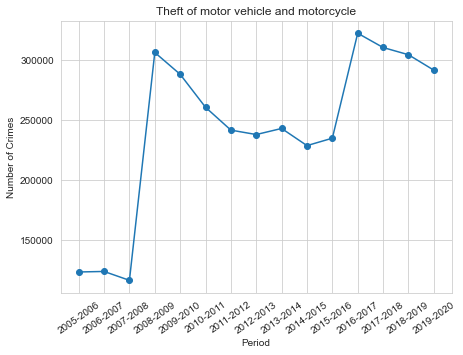

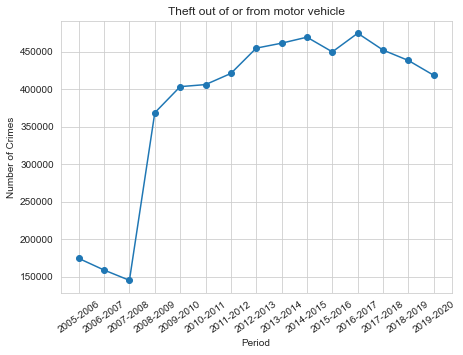

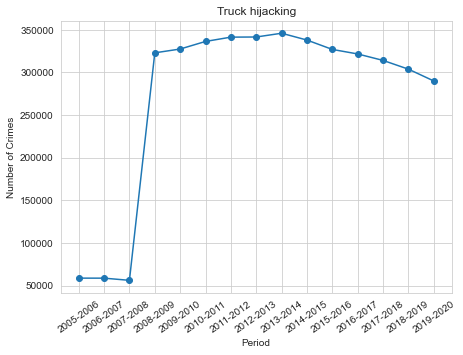

In [60]:
crime_category = Crime_Stats_SA.groupby(['Category'])['2005-2006','2006-2007','2007-2008','2008-2009',
                                              '2009-2010','2010-2011','2011-2012','2012-2013',
                                              '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019','2019-2020'].sum()
columns = crime_category.transpose().columns
crimes_by_category_transpose = crime_category.transpose()
crimes_by_category_transpose['index'] = crimes_by_category_transpose.index

number_rows=44
number_cols=1

for i in range(number_rows):
    fg,ax = plt.subplots(nrows=1,ncols=1,figsize=FIGSIZE)
    for j in range(number_cols):
        plt.plot(crimes_by_category_transpose['index'], crimes_by_category_transpose[columns[i]], linestyle='-', marker='o')
        ax.set_ylabel("Number of Crimes")
        ax.set_xlabel("Period")
        ax.set_xticks(crimes_by_category_transpose['index'])
        ax.set_xticklabels(crimes_by_category_transpose['index'],rotation=35)
        plt.title(columns[i*number_cols+j])

- The Above diagrams are showing The crimes trends for each crime category from the year 2005 until 2020

#####  Population per province visualization

Text(0.5, 0, 'Provinces')

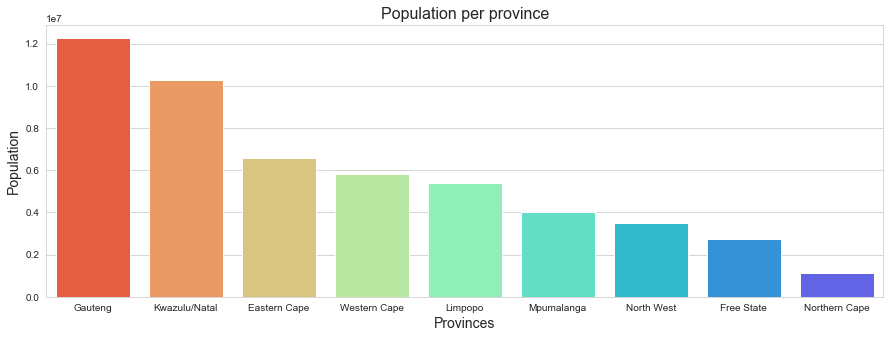

In [61]:
#Population per province visualization
plt.figure(figsize=(15,5)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=population_stats,y='Population',x='Province',palette='rainbow_r')
ax.set_title('Population per province',fontsize=16)
ax.set_ylabel('Population',fontsize=14)
ax.set_xlabel('Provinces',fontsize=14)

- From the diagram above which is showing the Number of population per province , we can see that Gauteng as the Highest population while Northen cape has the lowest population , and we will determine if this population has any influnce of the crime rate

#####  Number of Police Stations by Province

Text(0.5, 0, 'Provinces')

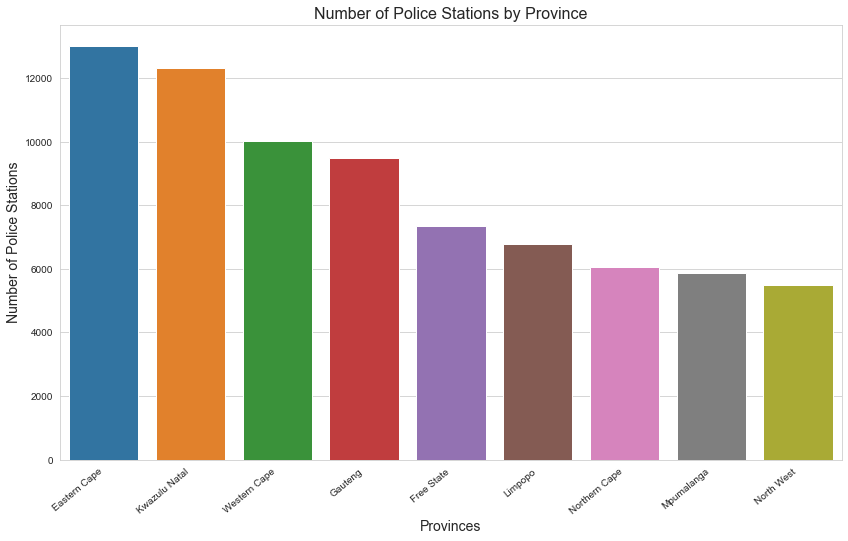

In [62]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=number_of_stations_per_province,x='Province',y='Total Stations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Number of Police Stations by Province',fontsize=16)
ax.set_ylabel('Number of Police Stations',fontsize=14)
ax.set_xlabel('Provinces',fontsize=14)

- The above diagram is showing the showing the number of police station per province , where the Eastern Cape has the highest number of police station and North west has the lowest number of police station . This will be usefull since the number of police station in a province influences the crime rate in Province.


#####  Total Crimes Reported by Province (2005-2020)
Crimes rates per province for the past 14 years

Text(0.5, 0, 'Provinces')

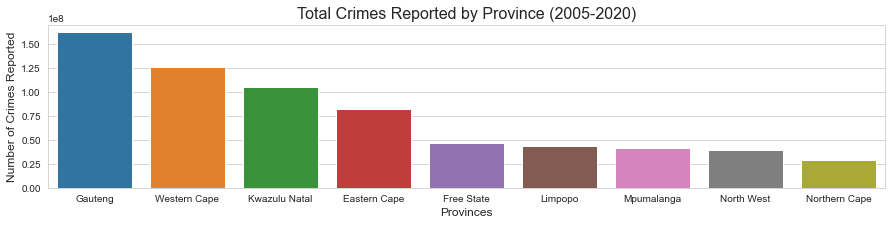

In [63]:
plt.figure(figsize=(15,3)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=crimes_by_Province_totals,x='Province',y='Total')
ax.set_xticklabels(ax.get_xticklabels(),fontsize=10,)
ax.set_title('Total Crimes Reported by Province (2005-2020)',fontsize=16)
ax.set_ylabel('Number of Crimes Reported',fontsize=12)
ax.set_xlabel('Provinces',fontsize=12)

- The above digram is showing the the Total Crime Reported per province from the year 2005 until 2020, and we can see that Gauteng has the highest number of reported crimes whiles the Northern cape has the lowest reported crime

#####  Checking for correlation

<AxesSubplot:title={'center':'Correlation Heatmap'}>

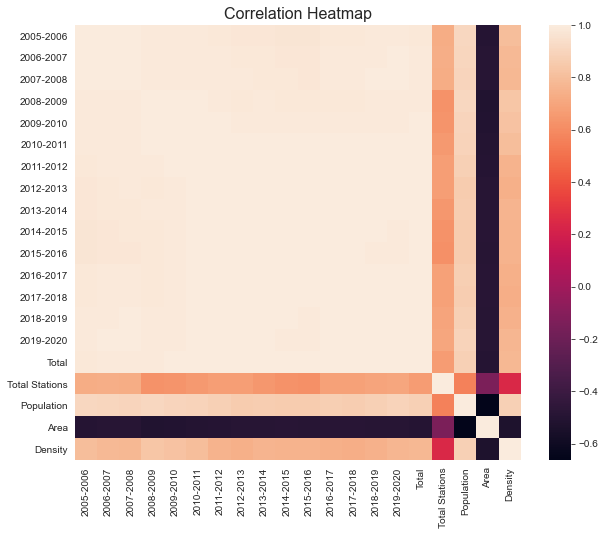

In [64]:
f,ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Heatmap',fontsize=16)
corr = crimes_by_Province_totals.corr()
sns.heatmap(corr,ax=ax)

- The diagram above is showing the correlation of crime  between Total Station , population ...ect.

In [65]:
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,Total,Total Stations,Population,Area,Density
2005-2006,1.00,1.00,1.00,0.99,0.99,0.99,0.98,0.98,0.98,0.97,0.97,0.98,0.98,0.99,0.99,0.99,0.73,0.91,-0.50,0.80
2006-2007,1.00,1.00,1.00,0.99,0.99,0.99,0.99,0.99,0.98,0.98,0.98,0.99,0.99,0.99,1.00,0.99,0.74,0.90,-0.49,0.78
2007-2008,1.00,1.00,1.00,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.98,0.99,0.99,0.99,1.00,0.99,0.73,0.90,-0.49,0.77
2008-2009,0.99,0.99,0.99,1.00,1.00,1.00,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.99,0.99,0.99,0.63,0.91,-0.52,0.84
2009-2010,0.99,0.99,0.99,1.00,1.00,1.00,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.00,0.64,0.90,-0.51,0.82
2010-2011,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.99,1.00,0.99,0.99,1.00,0.99,1.00,1.00,1.00,0.65,0.89,-0.50,0.80
2011-2012,0.98,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.67,0.88,-0.50,0.76
2012-2013,0.98,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.67,0.86,-0.49,0.74
2013-2014,0.98,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,1.00,0.64,0.87,-0.49,0.76
2014-2015,0.97,0.98,0.98,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,1.00,0.62,0.86,-0.49,0.76



From the  Correlation Heatmap There is a positive correlation between the total number of police stations in a province compared to the total amount of crimes, there is clearly a strong positive correlation between the total amount of crimes committed compared to the population and density of a Province.

#####  Correlation between 

<AxesSubplot:title={'center':'Correlation Heatmap'}>

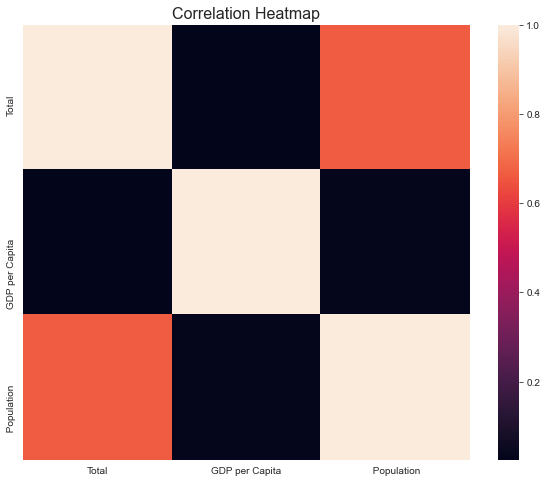

In [66]:
f,ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Heatmap',fontsize=16)
corr = GDP_and_Population_total.corr()
sns.heatmap(corr,ax=ax)


From the  Correlation Heatmap There is a positive correlation between the total number of police stations in a province to  population of a Province. 

In [67]:
corr.style.background_gradient().set_precision(2) # Set precision to 2 decimals

,Total,GDP per Capita,Population
Total,1.00,0.02,0.67
GDP per Capita,0.02,1.00,0.03
Population,0.67,0.03,1.00


### Conclusion
Crime has been high in the past year, over the past few year we have seen decrease on the crime rate on some provinces whiles there's minimal chance on others. Number of reported crimes is high on provinces with high population.positive correlation between the total number of police stations in a province compared to the total amount of crimes, there is clearly a strong positive correlation between the total amount of crimes committed compared to the population and density of a Province.